In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [194]:
train = pd.read_csv('../data/edu_train_csv', index_col='no', na_values=" ?")
test = pd.read_csv('../data/edu_test_csv', index_col='no' , na_values=" ?")

#### 상관관계 확인

In [195]:
# from sklearn.preprocessing import LabelEncoder
# temp =train.columns[train.dtypes=='object']

# le = LabelEncoder()
# for i in temp:
#     le.fit(train[i])
#     train[i] =le.transform(train[i])

In [196]:
# train.corr()['income'].abs().sort_values(ascending=False)

In [197]:
# train.drop('education-num',axis=1, inplace=True)
# test.drop('education-num',axis=1, inplace=True)

### 데이터 전처리

In [198]:
train.isnull().sum()

age                  0
workclass         1663
fnlwgt               0
education            0
marital-status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     495
income               0
dtype: int64

In [199]:
train['age']

no
1        25
2        39
3        35
4        64
5        24
         ..
29301    20
29302    21
29303    18
29304    33
29305    65
Name: age, Length: 29305, dtype: int64

C:\Users\smhrd\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


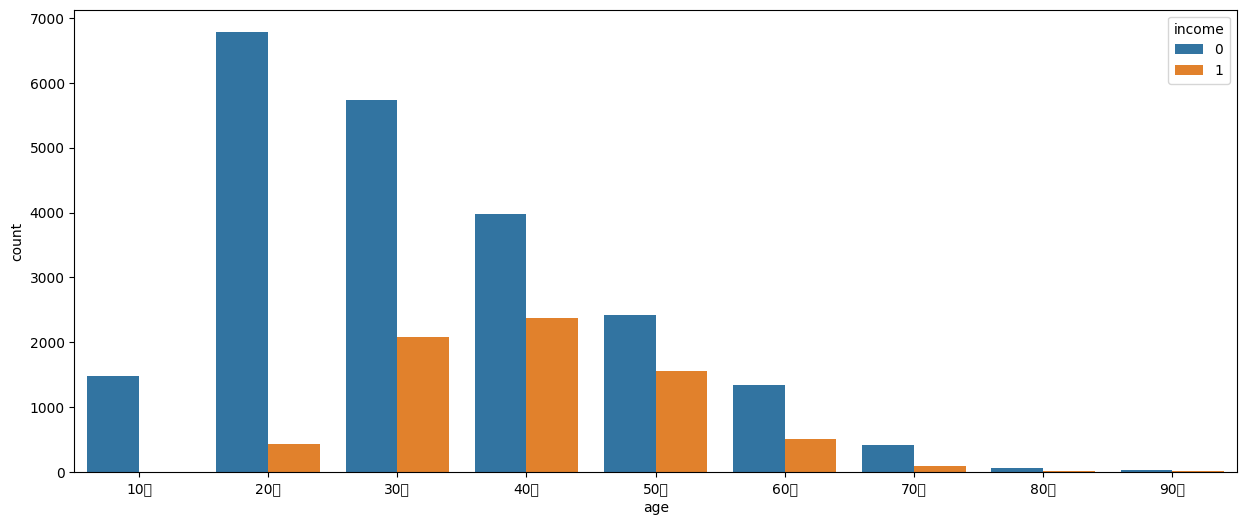

In [200]:
train['age']=train['age']//10*10
train['age']

bin = [-np.inf,10,20,30,40,50,60,70,80,91]
label = ["10대","20대","30대","40대","50대","60대","70대","80대","90대"]
train['age'] = pd.cut(train['age'], bins=bin, labels=label)

plt.figure(figsize=(15,6))
sns.countplot(train,x='age', hue='income')
plt.show()

### workclass 전처리

In [201]:
train['workclass'] = train['workclass'].fillna(" temp") 

In [202]:
train['workclass'].value_counts()

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 temp                 1663
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

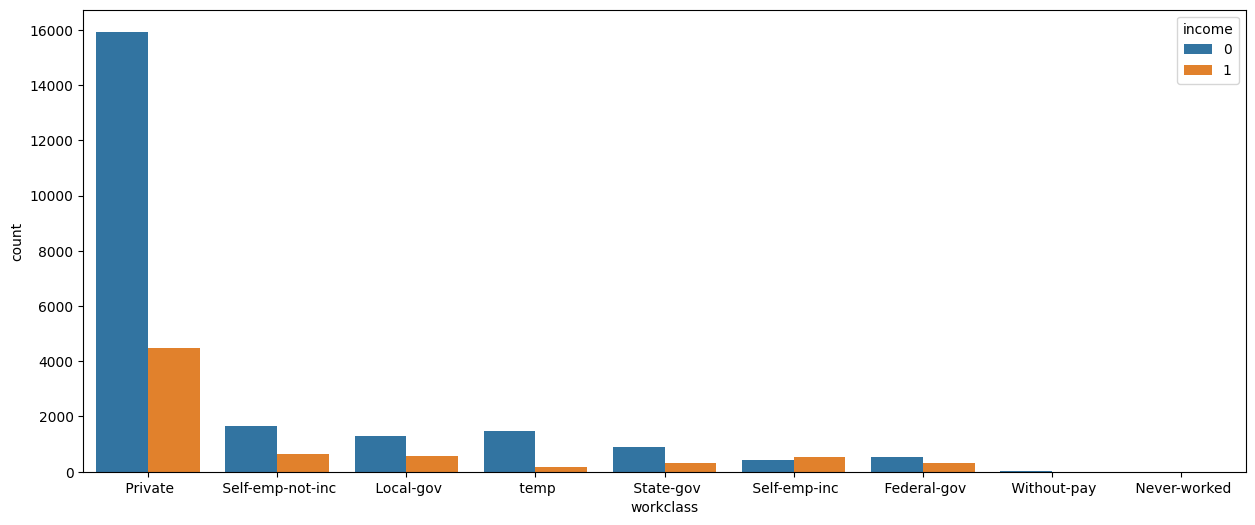

In [203]:
plt.figure(figsize=(15,6))
sns.countplot(train, x='workclass', hue='income')
plt.show()

In [204]:
train['workclass'].unique()

array([' Private', ' Self-emp-not-inc', ' Local-gov', ' temp',
       ' State-gov', ' Self-emp-inc', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [205]:
test['workclass'] = test['workclass'].fillna(" temp") 

In [206]:
# train-title
title =[' Private', ' Self-emp-not-inc', ' Local-gov', ' temp', ' State-gov',
       ' Federal-gov',' Self-emp-inc', ' Without-pay', ' Never-worked']
cvt_title = ['normal']*6+['other']+['noincome']*2
cvt_title

#dict 
title_dict =dict(zip(title,cvt_title))
train['workclass']=train['workclass'].map(title_dict)

In [207]:
test['workclass'].unique()

array([' temp', ' Private', ' Self-emp-not-inc', ' Local-gov',
       ' Self-emp-inc', ' State-gov', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [208]:
title2 = [' temp', ' Private', ' Self-emp-not-inc', ' Local-gov',
        ' State-gov', ' Federal-gov',' Self-emp-inc', ' Without-pay',
       ' Never-worked']
cvt_title2 = ['normal']*6+['other']+['noincome']*2

#dict 
title_dict2 =dict(zip(title2,cvt_title2))
test['workclass']=test['workclass'].map(title_dict2)

test['workclass'].head(10)

no
29306    normal
29307    normal
29308    normal
29309    normal
29310    normal
29311    normal
29312    normal
29313     other
29314    normal
29315    normal
Name: workclass, dtype: object

### capital 전처리

In [209]:
# train
train['capital-margin'] = train['capital-gain'] - train['capital-loss']
train['capital-total'] = train['capital-gain'] + train['capital-loss']
train['capital'] = np.nan

In [210]:
train.loc[train['capital-margin']==0, 'capital'] = 'zero'
train.loc[train['capital-margin']>0, 'capital'] = 'positive'
train.loc[train['capital-margin']<0, 'capital'] = 'negative'

In [211]:
# test
test['capital-margin'] = test['capital-gain'] - test['capital-loss']
test['capital-total'] = test['capital-gain'] + test['capital-loss']
test['capital'] = np.nan

In [212]:
test.loc[test['capital-margin']==0, 'capital'] = 'zero'
test.loc[test['capital-margin']>0, 'capital'] = 'positive'
test.loc[test['capital-margin']<0, 'capital'] = 'negative'

In [214]:
train['capital'].unique()

array(['zero', 'negative', 'positive'], dtype=object)

In [239]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-loss',
       'hours-per-week', 'native-country', 'income', 'capital-total',
       'capital'],
      dtype='object')

In [240]:
# train.drop('capital-gain',axis=1, inplace=True)
# train.drop('captial-loss',axis=1, inplace=True)
# train.drop('capital-margin',axis=1, inplace=True)


In [ ]:
train.drop('capital-total', axis=1, inplace=True)